## Data Visualization for Lodging structures classifier in Lombardy, Italy

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from IPython.display import Image
data = pd.read_csv('classification_dataset.csv', sep='\t') 
union = pd.read_csv('union.csv', sep=None, engine='python') 

### Geographical data

In [7]:
hotel_high = data[['LONGITUDINE','LATITUDINE']].loc[data['OUTPUT'] == '4_a_5_Stelle'].dropna()
hotel_low = data[['LONGITUDINE','LATITUDINE']].loc[data['OUTPUT'] == '1_a_3_Stelle'].dropna()
case = data[['LONGITUDINE','LATITUDINE']].loc[data['OUTPUT'] == 'Case_Appartamenti'].dropna()
bb = data[['LONGITUDINE','LATITUDINE']].loc[data['OUTPUT'] == 'B&B'].dropna()
campeggi = data[['LONGITUDINE','LATITUDINE']].loc[data['OUTPUT'] == 'Campeggio'].dropna()
mancanti = data[['LONGITUDINE','LATITUDINE']].loc[data['SUL_LAGO'].isnull()]

In [13]:
#mapping 4_a_5_Stelle and 1_a_3_Stelle
mapp = folium.Map(
    location=[45.799336, 9.884472],
    zoom_start=8,
    tiles='cartodbpositron')

for coord in hotel_low.values:
    folium.CircleMarker(location=[ coord[0], coord[1]], color='blue', opacity=0.6, radius =0.5).add_to(mapp1)

for coord in hotel_high.values:
    folium.CircleMarker(location=[ coord[0], coord[1]], color='red', opacity= 0.8, radius =0.5).add_to(mapp1)

legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 100px; height: 90px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Legend <br>
                              &nbsp; 1_3star &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
                              &nbsp; 4_5star &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>
                </div>
                ''' 

mapp.get_root().html.add_child(folium.Element(legend_html))
mapp1

In [15]:
#plotting Campeggi and B&B
mapp2 = folium.Map(
    location=[45.799336, 9.884472],
    zoom_start=8,
    tiles='cartodbpositron')

for coord in bb.values:
    folium.CircleMarker(location=[ coord[0], coord[1]], color='rgb(51, 204, 51)', opacity=0.6, radius =0.5).add_to(mapp2)

for coord in campeggi.values:
    folium.CircleMarker(location=[ coord[0], coord[1]], color='magenta', opacity=0.9, radius =0.5).add_to(mapp2)
    
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 100px; height: 90px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Legend <br>
                              &nbsp; B&B  &nbsp; <i class="fa fa-map-marker fa-2x" style="color:rgb(51, 204, 51)"></i><br>
                              &nbsp; Camp &nbsp; <i class="fa fa-map-marker fa-2x" style="color:magenta"></i>
                </div>
                ''' 
mapp2.get_root().html.add_child(folium.Element(legend_html))
mapp2

In [16]:
# plotting of Case_Appartamenti
mapp3 = folium.Map(
    location=[45.799336, 9.884472],
    zoom_start=8,
    tiles='cartodbpositron')

for coord in case.values:
    folium.CircleMarker(location=[ coord[0], coord[1]], color='rgb(153, 51, 255', opacity=0.6, radius =0.5).add_to(mapp3)
    
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 100px; height: 50px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Legend <br>
                              &nbsp; Homes  &nbsp; <i class="fa fa-map-marker fa-2x" style="color:rgb(153, 51, 255)"></i><br>
                              
                </div>
                ''' 

mapp3.get_root().html.add_child(folium.Element(legend_html))
mapp3

### Class distribution

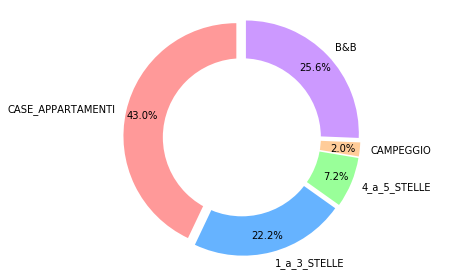

In [31]:
# Pie chart of the class distribution of the data
labels = ['CASE_APPARTAMENTI', '1_a_3_STELLE', '4_a_5_STELLE', 'CAMPEGGIO','B&B' ]
sizes = [2910, 1504, 489, 135, 1737]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#cc99ff']

explode = (0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Model Interpretation

In [44]:
Y = union['OUTPUT']
X = union.drop(['OUTPUT'], axis=1)

This graph shows the top 10 features for each model. On the x-axis we have the sorted features and on the y-axis we have the Importance score %. 

/Users/lorenzogessner/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


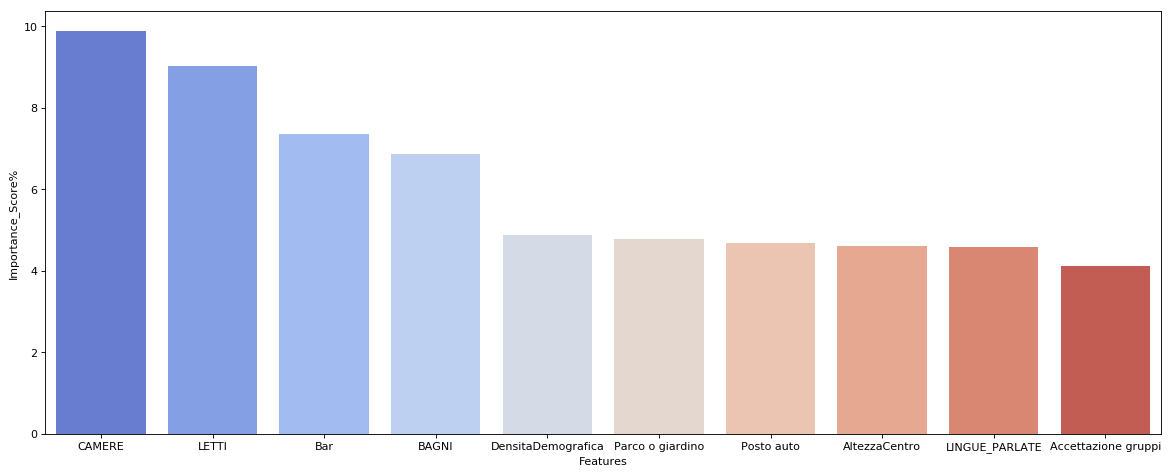

In [47]:
#RandomForest feature importance
model = RandomForestClassifier()
model.fit(X, Y)

# display the relative importance of each attribute
feature_scores = model.feature_importances_

#creates a dataframe to combine feature names and importance score
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance_Score%':feature_scores*100})\
                            .sort_values(by='Importance_Score%', ascending=False).reset_index(drop=True)


fig=plt.figure(figsize=(18, 7), dpi= 80, facecolor='w', edgecolor='k')  
sns.barplot(feature_importance['Features'].head(10) , feature_importance['Importance_Score%'].head(10),\
            palette='coolwarm');

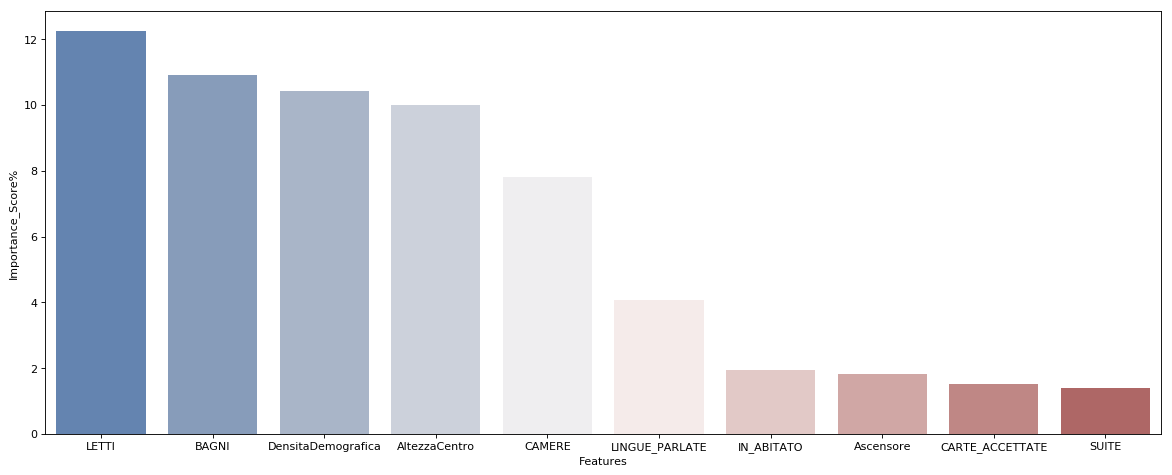

In [48]:
#XGBClassifier feature importance
model = XGBClassifier(n_estimators=160, max_depth=5)
model.fit(X, Y)

# find the relative importance of each attribute
feature_scores = model.feature_importances_

#creates a dataframe to combine feature names and importance score
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance_Score%':feature_scores*100})\
                            .sort_values(by='Importance_Score%', ascending=False).reset_index(drop=True)

fig=plt.figure(figsize=(18, 7), dpi= 80, facecolor='w', edgecolor='k')  
sns.barplot(feature_importance['Features'].head(10) , feature_importance['Importance_Score%'].head(10),\
            palette='vlag');

/Users/lorenzogessner/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7774169741697416


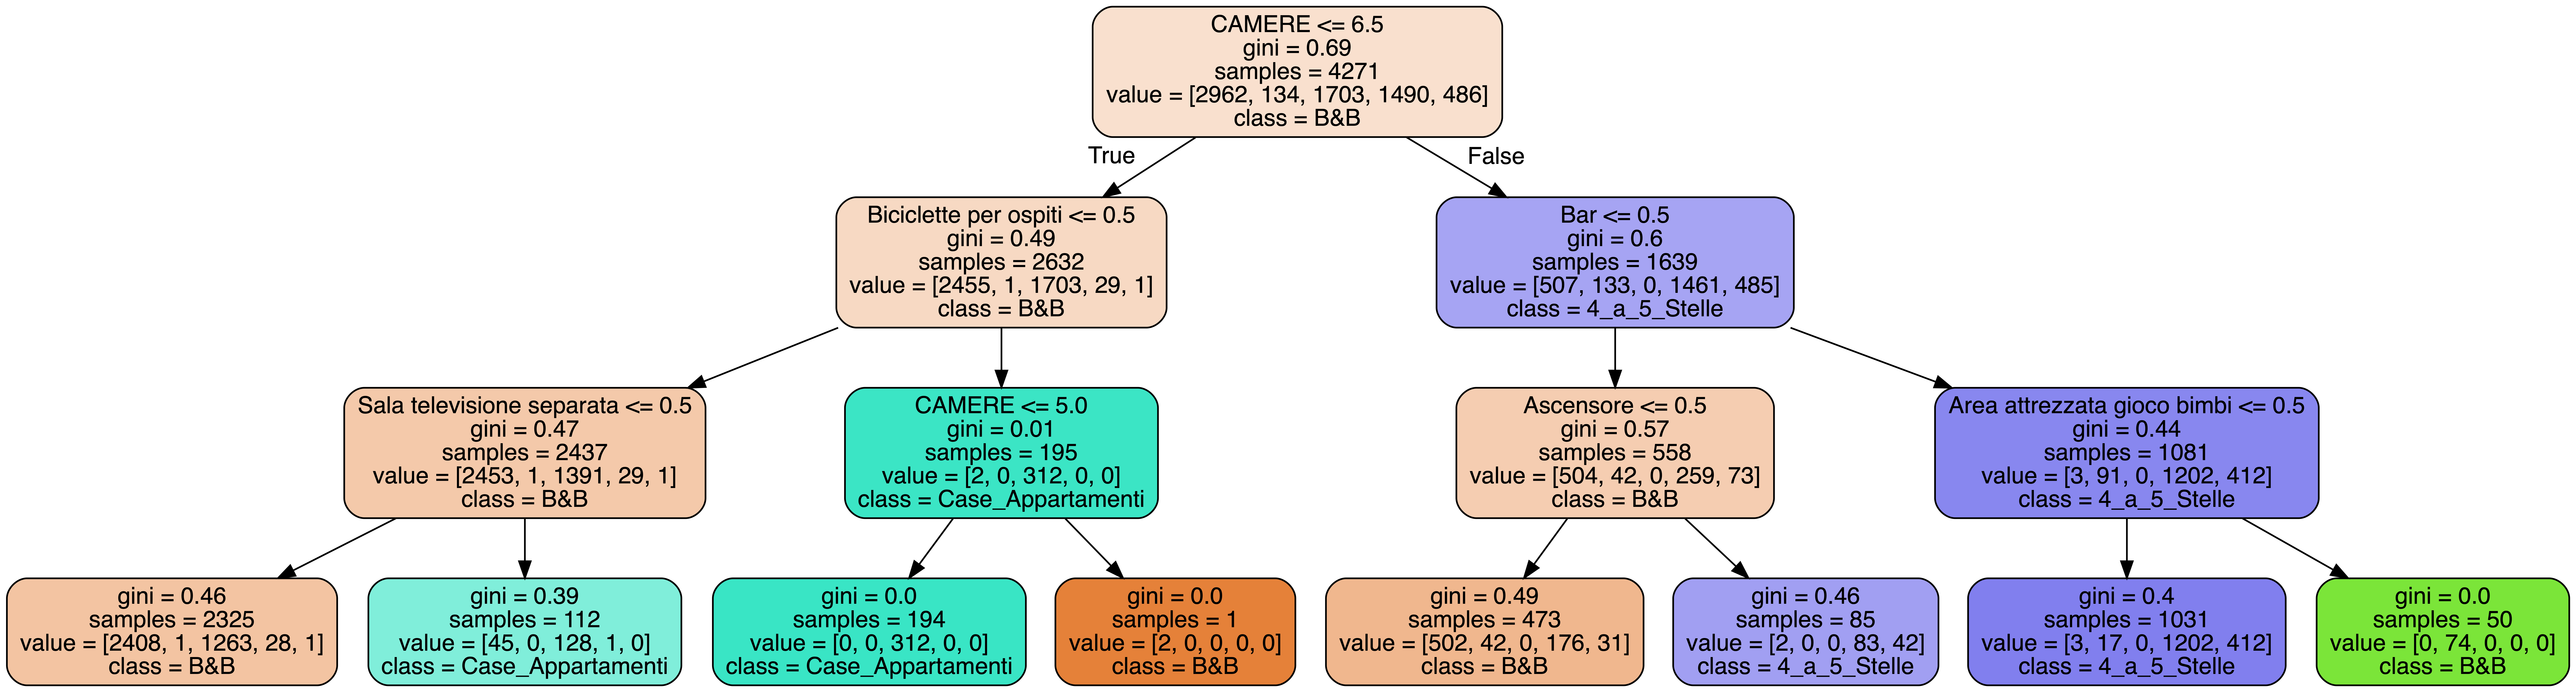

In [55]:
#Building a very shallow tree(max_depth=3) for showing how this kind of model can be interpreted

model_limited = RandomForestClassifier(max_depth=3)
model_limited.fit(X, Y)
print(model_limited.score(X,Y))


estimator = model_limited.estimators_[0] #index picks which tree to print

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = data['OUTPUT'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png 
call(['dot', '-Tpng', 'tree.dot', '-o' 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')